# Лабораторная #3
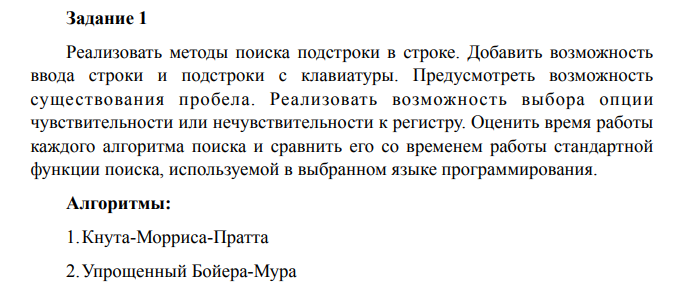

In [4]:
import time
import timeit

In [18]:
word = input()

sentence = input()


reachedd
The SteelSeries Arctis 1 RF Headphones are a gaming device that comes in a black casing with wraparound ear pads. The model uses the headband attachment method, which provides a comfortable fit: you can adjust the position of the body to find the most comfortable position. The model is made in a metal case, which ensures the durability and wear resistance of the device. The soft ear cushions provide comfort throughout the game.SteelSeries Arctis 1 supports sound in the frequency range of 20-20000 Hz, which allows you to achieve balanced sound with clear highs and mids and deep and powerful lows. The peculiarity of the headphones is in support of wireless connection, for which the model uses a radio channel. On the body of the device there is a microphone with a movable mount, which turns the model into a full-fledged headset. You can push the microphone back if you don't need to communicate. The bi-directional microphone is noise canceling.This algorithm is also known as the B

In [19]:
class Prefix:
    def __init__(self, word1,sentence2):
        self.sentence = sentence2
        self.word = word1

    #Индексация Кнута-Морриса-Пратта
    def prefix(self):
        v = [0]*len(self.word)
        for i in range(1,len(self.word)):
            k = v[i-1]
            while k > 0 and self.word[k] != self.word[i]:
                k = v[k-1]
            if self.word[k] == self.word[i]:
                k = k + 1
            v[i] = k
        return v
    
    #Индексация Бойера-Мура
    def slip(self):
        slipz = []
        b = 0
        for i in range(0, len(self.word)):
            b = b + 1
            slipz.append(len(self.word) - b)

        for i in range(0, len(self.word)):
            for b in range(0, len(self.word)):
                if self.word[i] == self.word[b]:
                    slipz[b] = slipz[i]
        del slipz[len(slipz) - 1]
        slipz.append(len(slipz) + 1)
        return slipz

In [20]:
class Kmp(Prefix):
    start_time = time.time()
    # алгоритм Кнута-Морриса-Пратта
    def kmp(self):
        
        index = -1
        f = Prefix.prefix(self)
        k = 0
        for i in range(len(self.sentence)):
            while k > 0 and self.word[k] != self.sentence[i]:
                k = f[k-1]
            if self.word[k] == self.sentence[i]:
                k = k + 1
            if k == len(self.word):
                index = i - len(self.word) + 1
                break
        return index

In [23]:
class Sbm(Prefix):
    start_time2 = time.time()
    # алгоритм Упрощенный Бойера-Мура
    def sbm(self):
        f = Prefix.slip(self)
        index = -1
        k = 0
        check = 0
        posword = int(len(self.word)) - 1
        poswordinsent = int(len(self.word)) - 1
        while k != len(self.word) and poswordinsent <= len(self.sentence) - 1:
            if self.word[posword] == self.sentence[poswordinsent]:
                check = 0
                k += 1
                check += 1
                poswordinsent = poswordinsent - 1
                posword = posword - 1
            else:
                k = 0
                posword = int(len(self.word)) - 1
                if self.word.find(self.sentence[poswordinsent]) != -1:
                    poswordinsent += f[self.word.index(self.sentence[poswordinsent])]
                else:
                    poswordinsent += int(len(self.word) - 1) + check
                    check = 0
            if poswordinsent > len(self.sentence):
                poswordinsent = len(self.sentence) - 1
        if k == len(self.word):
            index = poswordinsent + 1
        return index

In [26]:
if __name__ == "__main__":
    Knutmp = Kmp(word,sentence)
    print("Начальная позиция слова: ", Knutmp.kmp()," - алгоритм Кнута-Морриса-Пратта")
    simplbm = Sbm(word,sentence)
    print("Начальная позиция слова: ",simplbm.sbm()," - алгоритм Упрощенный Бойера-Мура")

Начальная позиция слова:  3420  - алгоритм Кнута-Морриса-Пратта
Начальная позиция слова:  3420  - алгоритм Упрощенный Бойера-Мура


In [30]:
code_to_test = """
class Prefix:
    def __init__(self, word1,sentence2):
        self.sentence = sentence2
        self.word = word1

    #Индексация Кнута-Морриса-Пратта
    def prefix(self):
        v = [0]*len(self.word)
        for i in range(1,len(self.word)):
            k = v[i-1]
            while k > 0 and self.word[k] != self.word[i]:
                k = v[k-1]
            if self.word[k] == self.word[i]:
                k = k + 1
            v[i] = k
        return v
    
    #Индексация Бойера-Мура
    def slip(self):
        slipz = []
        b = 0
        for i in range(0, len(self.word)):
            b = b + 1
            slipz.append(len(self.word) - b)

        for i in range(0, len(self.word)):
            for b in range(0, len(self.word)):
                if self.word[i] == self.word[b]:
                    slipz[b] = slipz[i]
        del slipz[len(slipz) - 1]
        slipz.append(len(slipz) + 1)
        return slipz
class Kmp(Prefix):
    start_time = time.time()
    # алгоритм Кнута-Морриса-Пратта
    def kmp(self):
        
        index = -1
        f = Prefix.prefix(self)
        k = 0
        for i in range(len(self.sentence)):
            while k > 0 and self.word[k] != self.sentence[i]:
                k = f[k-1]
            if self.word[k] == self.sentence[i]:
                k = k + 1
            if k == len(self.word):
                index = i - len(self.word) + 1
                break
        return index
"""

elapsed_time = timeit.timeit(code_to_test, number=100)/100
print("Kmp - ",elapsed_time)

code_to_test = """
class Prefix:
    def __init__(self, word1,sentence2):
        self.sentence = sentence2
        self.word = word1

    #Индексация Кнута-Морриса-Пратта
    def prefix(self):
        v = [0]*len(self.word)
        for i in range(1,len(self.word)):
            k = v[i-1]
            while k > 0 and self.word[k] != self.word[i]:
                k = v[k-1]
            if self.word[k] == self.word[i]:
                k = k + 1
            v[i] = k
        return v
    
    #Индексация Бойера-Мура
    def slip(self):
        slipz = []
        b = 0
        for i in range(0, len(self.word)):
            b = b + 1
            slipz.append(len(self.word) - b)

        for i in range(0, len(self.word)):
            for b in range(0, len(self.word)):
                if self.word[i] == self.word[b]:
                    slipz[b] = slipz[i]
        del slipz[len(slipz) - 1]
        slipz.append(len(slipz) + 1)
        return slipz
class Sbm(Prefix):
    start_time2 = time.time()
    # алгоритм Упрощенный Бойера-Мура
    def sbm(self):
        f = Prefix.slip(self)
        index = -1
        k = 0
        check = 0
        posword = int(len(self.word)) - 1
        poswordinsent = int(len(self.word)) - 1
        while k != len(self.word) and poswordinsent <= len(self.sentence) - 1:
            if self.word[posword] == self.sentence[poswordinsent]:
                check = 0
                k += 1
                check += 1
                poswordinsent = poswordinsent - 1
                posword = posword - 1
            else:
                k = 0
                posword = int(len(self.word)) - 1
                if self.word.find(self.sentence[poswordinsent]) != -1:
                    poswordinsent += f[self.word.index(self.sentence[poswordinsent])]
                else:
                    poswordinsent += int(len(self.word) - 1) + check
                    check = 0
            if poswordinsent > len(self.sentence):
                poswordinsent = len(self.sentence) - 1
        if k == len(self.word):
            index = poswordinsent + 1
        return index
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print("Sbm - ",elapsed_time)

Kmp -  9.118000000398752e-06
Sbm -  9.761000000025887e-06


In [31]:
word = input()

sentence = input()


red
green peper red vice twice


In [32]:
start_time = time.time()
Knutmp = Kmp(word,sentence)
print("Начальная позиция слова: ", Knutmp.kmp()," - алгоритм Кнута-Морриса-Пратта")
start_time2 = time.time()
simplbm = Sbm(word,sentence)
print("Начальная позиция слова: ",simplbm.sbm()," - алгоритм Упрощенный Бойера-Мура")

Начальная позиция слова:  12  - алгоритм Кнута-Морриса-Пратта
Начальная позиция слова:  12  - алгоритм Упрощенный Бойера-Мура


In [42]:
code_to_test = """
class Prefix:
    def __init__(self, word1,sentence2):
        self.sentence = sentence2
        self.word = word1

    #Индексация Кнута-Морриса-Пратта
    def prefix(self):
        v = [0]*len(self.word)
        for i in range(1,len(self.word)):
            k = v[i-1]
            while k > 0 and self.word[k] != self.word[i]:
                k = v[k-1]
            if self.word[k] == self.word[i]:
                k = k + 1
            v[i] = k
        return v
    
    #Индексация Бойера-Мура
    def slip(self):
        slipz = []
        b = 0
        for i in range(0, len(self.word)):
            b = b + 1
            slipz.append(len(self.word) - b)

        for i in range(0, len(self.word)):
            for b in range(0, len(self.word)):
                if self.word[i] == self.word[b]:
                    slipz[b] = slipz[i]
        del slipz[len(slipz) - 1]
        slipz.append(len(slipz) + 1)
        return slipz
class Kmp(Prefix):
    start_time = time.time()
    # алгоритм Кнута-Морриса-Пратта
    def kmp(self):
        
        index = -1
        f = Prefix.prefix(self)
        k = 0
        for i in range(len(self.sentence)):
            while k > 0 and self.word[k] != self.sentence[i]:
                k = f[k-1]
            if self.word[k] == self.sentence[i]:
                k = k + 1
            if k == len(self.word):
                index = i - len(self.word) + 1
                break
        return index
"""

elapsed_time = timeit.timeit(code_to_test, number=100)/100
print("Kmp - ",elapsed_time)

code_to_test = """
class Prefix:
    def __init__(self, word1,sentence2):
        self.sentence = sentence2
        self.word = word1

    #Индексация Кнута-Морриса-Пратта
    def prefix(self):
        v = [0]*len(self.word)
        for i in range(1,len(self.word)):
            k = v[i-1]
            while k > 0 and self.word[k] != self.word[i]:
                k = v[k-1]
            if self.word[k] == self.word[i]:
                k = k + 1
            v[i] = k
        return v
    
    #Индексация Бойера-Мура
    def slip(self):
        slipz = []
        b = 0
        for i in range(0, len(self.word)):
            b = b + 1
            slipz.append(len(self.word) - b)

        for i in range(0, len(self.word)):
            for b in range(0, len(self.word)):
                if self.word[i] == self.word[b]:
                    slipz[b] = slipz[i]
        del slipz[len(slipz) - 1]
        slipz.append(len(slipz) + 1)
        return slipz
class Sbm(Prefix):
    start_time2 = time.time()
    # алгоритм Упрощенный Бойера-Мура
    def sbm(self):
        f = Prefix.slip(self)
        index = -1
        k = 0
        check = 0
        posword = int(len(self.word)) - 1
        poswordinsent = int(len(self.word)) - 1
        while k != len(self.word) and poswordinsent <= len(self.sentence) - 1:
            if self.word[posword] == self.sentence[poswordinsent]:
                check = 0
                k += 1
                check += 1
                poswordinsent = poswordinsent - 1
                posword = posword - 1
            else:
                k = 0
                posword = int(len(self.word)) - 1
                if self.word.find(self.sentence[poswordinsent]) != -1:
                    poswordinsent += f[self.word.index(self.sentence[poswordinsent])]
                else:
                    poswordinsent += int(len(self.word) - 1) + check
                    check = 0
            if poswordinsent > len(self.sentence):
                poswordinsent = len(self.sentence) - 1
        if k == len(self.word):
            index = poswordinsent + 1
        return index
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print("Sbm - ",elapsed_time)

Kmp -  9.070999999494233e-06
Sbm -  8.616000000074564e-06
